In [543]:

import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as plt
%matplotlib inline
from pandas import Series
from pandas import DataFrame
#from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix

from pylab import rcParams
import scipy as sp
import seaborn as sns
import xgboost as xgb

from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

import sklearn
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import neighbors

from sklearn.preprocessing import scale
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import model_selection

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.kernel_ridge import KernelRidge

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.compose import ColumnTransformer

from sklearn.externals import joblib

from collections import Counter
from sklearn import datasets

from IPython.display import Image
from IPython.core.display import HTML




### Here are the main steps you will go through:
    Look at the big picture. 
    Get the data. 
    Discover and visualize the data to gain insights. 
    Prepare the data for Machine Learning algorithms. 
    Select a model and train it. 
    Fine-tune your model. 
    Present your solution. 
    Launch, monitor, and maintain your system.

### Project overview
    With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.
    
### Select a Performance Measure

### Check the Assumptions

In [7]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [8]:
#read in train data
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
a=train.shape
b=test.shape
print("train's shape",a)
print("test's shape",b)

train's shape (1460, 81)
test's shape (1459, 80)


In [10]:
#read in test data
test=pd.read_csv("test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [11]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Data fields
Here's a brief version of what you'll find in the data description file.

    SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

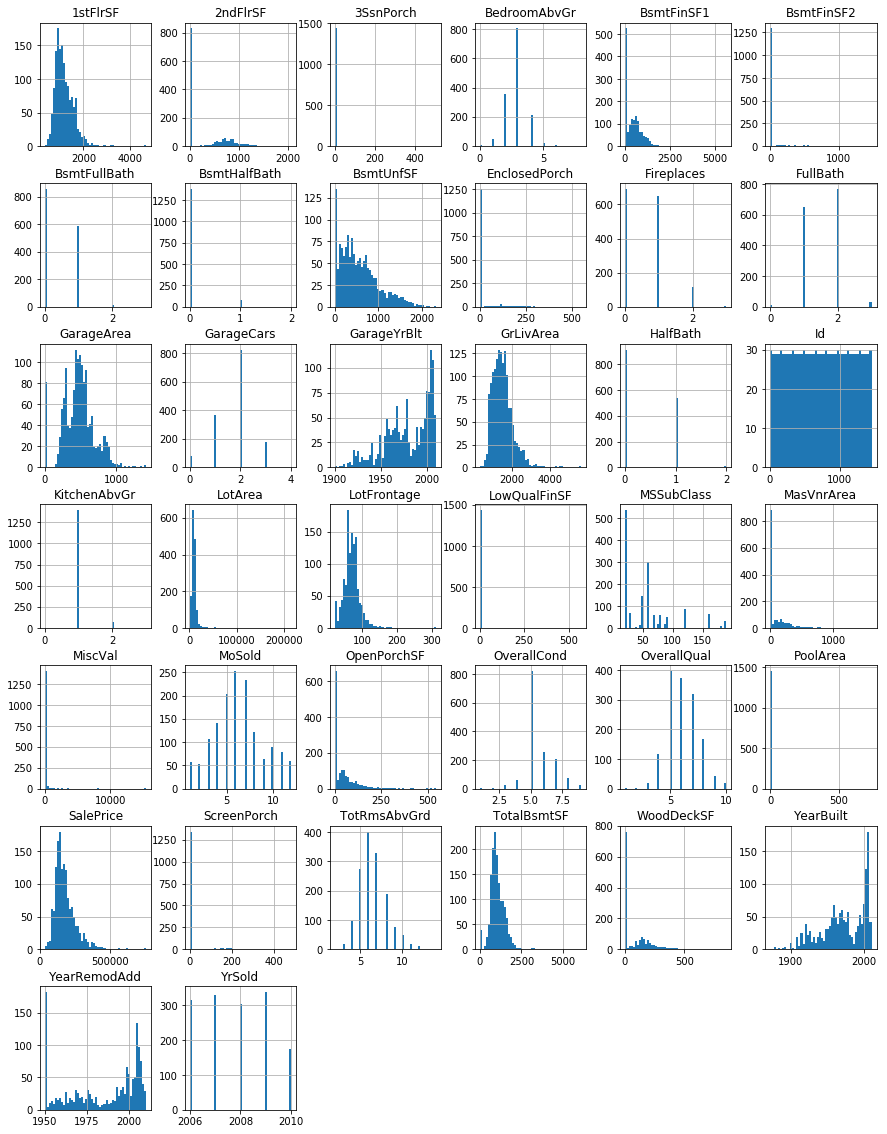

In [13]:
train.hist(bins=50,figsize=(15,20))

plt.show()

In [14]:
### Create a validation set
    #you can use from sklearn.model_selection "train_test_split" for random sampling if you have a large dataset
    # but you run the risk of introducing a significant sampling bias.
    # We will assume that we are told that median income is a very important attribute, thus we will make new feature
    # called income_category to help split and shuffle the data to make sure we have adequate sampling for the different
    #income categories
    
#split the training and testing data based OverallCond
#from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)
for train_index, test_index in split.split(train, train["OverallQual"]):
    strat_train_set = train.loc[train_index]
    strat_validation_set = train.loc[test_index]

In [15]:
#Lets look at the proportion of data allocated to each income category for the training set
strat_train_set.OverallQual.value_counts()/len(strat_train_set)*100

5     27.226027
6     25.599315
7     21.832192
8     11.558219
4      7.962329
9      2.910959
3      1.369863
10     1.198630
2      0.171233
1      0.171233
Name: OverallQual, dtype: float64

In [16]:
#Lets look at the proportion of data allocated to each income category for the validation set
strat_validation_set.OverallQual.value_counts()/len(strat_validation_set)*100

5     27.054795
6     25.684932
7     21.917808
8     11.301370
4      7.876712
9      3.082192
10     1.369863
3      1.369863
2      0.342466
Name: OverallQual, dtype: float64

In [17]:
#Lets look at the proportion of data allocated to each income category for the original training set
train.OverallQual.value_counts()/len(train)*100

5     27.191781
6     25.616438
7     21.849315
8     11.506849
4      7.945205
9      2.945205
3      1.369863
10     1.232877
2      0.205479
1      0.136986
Name: OverallQual, dtype: float64

In [18]:
#lets separate out the categorical features
cat_attrib=strat_train_set.select_dtypes(include=['object'])
cat_attrib.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
825,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,PosN,PosN,1Fam,1Story,Hip,CompShg,CemntBd,CmentBd,BrkFace,Ex,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Gd,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,New,Partial
948,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,NaN,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
188,RL,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,Duplex,SFoyer,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,TA,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Alloca
1059,RL,Pave,NaN,IR1,HLS,AllPub,Corner,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,MetalSd,MetalSd,BrkFace,TA,TA,CBlock,TA,TA,Mn,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Gd,Detchd,Unf,TA,Fa,Y,NaN,NaN,NaN,WD,Normal
667,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,BrkFace,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Fa,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [19]:
cat_attrib.shape

(1168, 43)

In [20]:
#Lets create a count plot of the categorical feature variables

def plot_new_feature_distribution(df1,features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, axis = plt.subplots(8,6,figsize=(30,30))
    axis = axis.flatten()

    
    for feature in features:
        i += 1
        plt.subplot(8,6,i)
        sns.countplot(y=df1[feature],data=df1)
        #plt.xlabel(feature, fontsize=11)
        #locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=8)
        plt.tick_params(axis='y', which='major', labelsize=8)
    plt.show();

<Figure size 432x288 with 0 Axes>

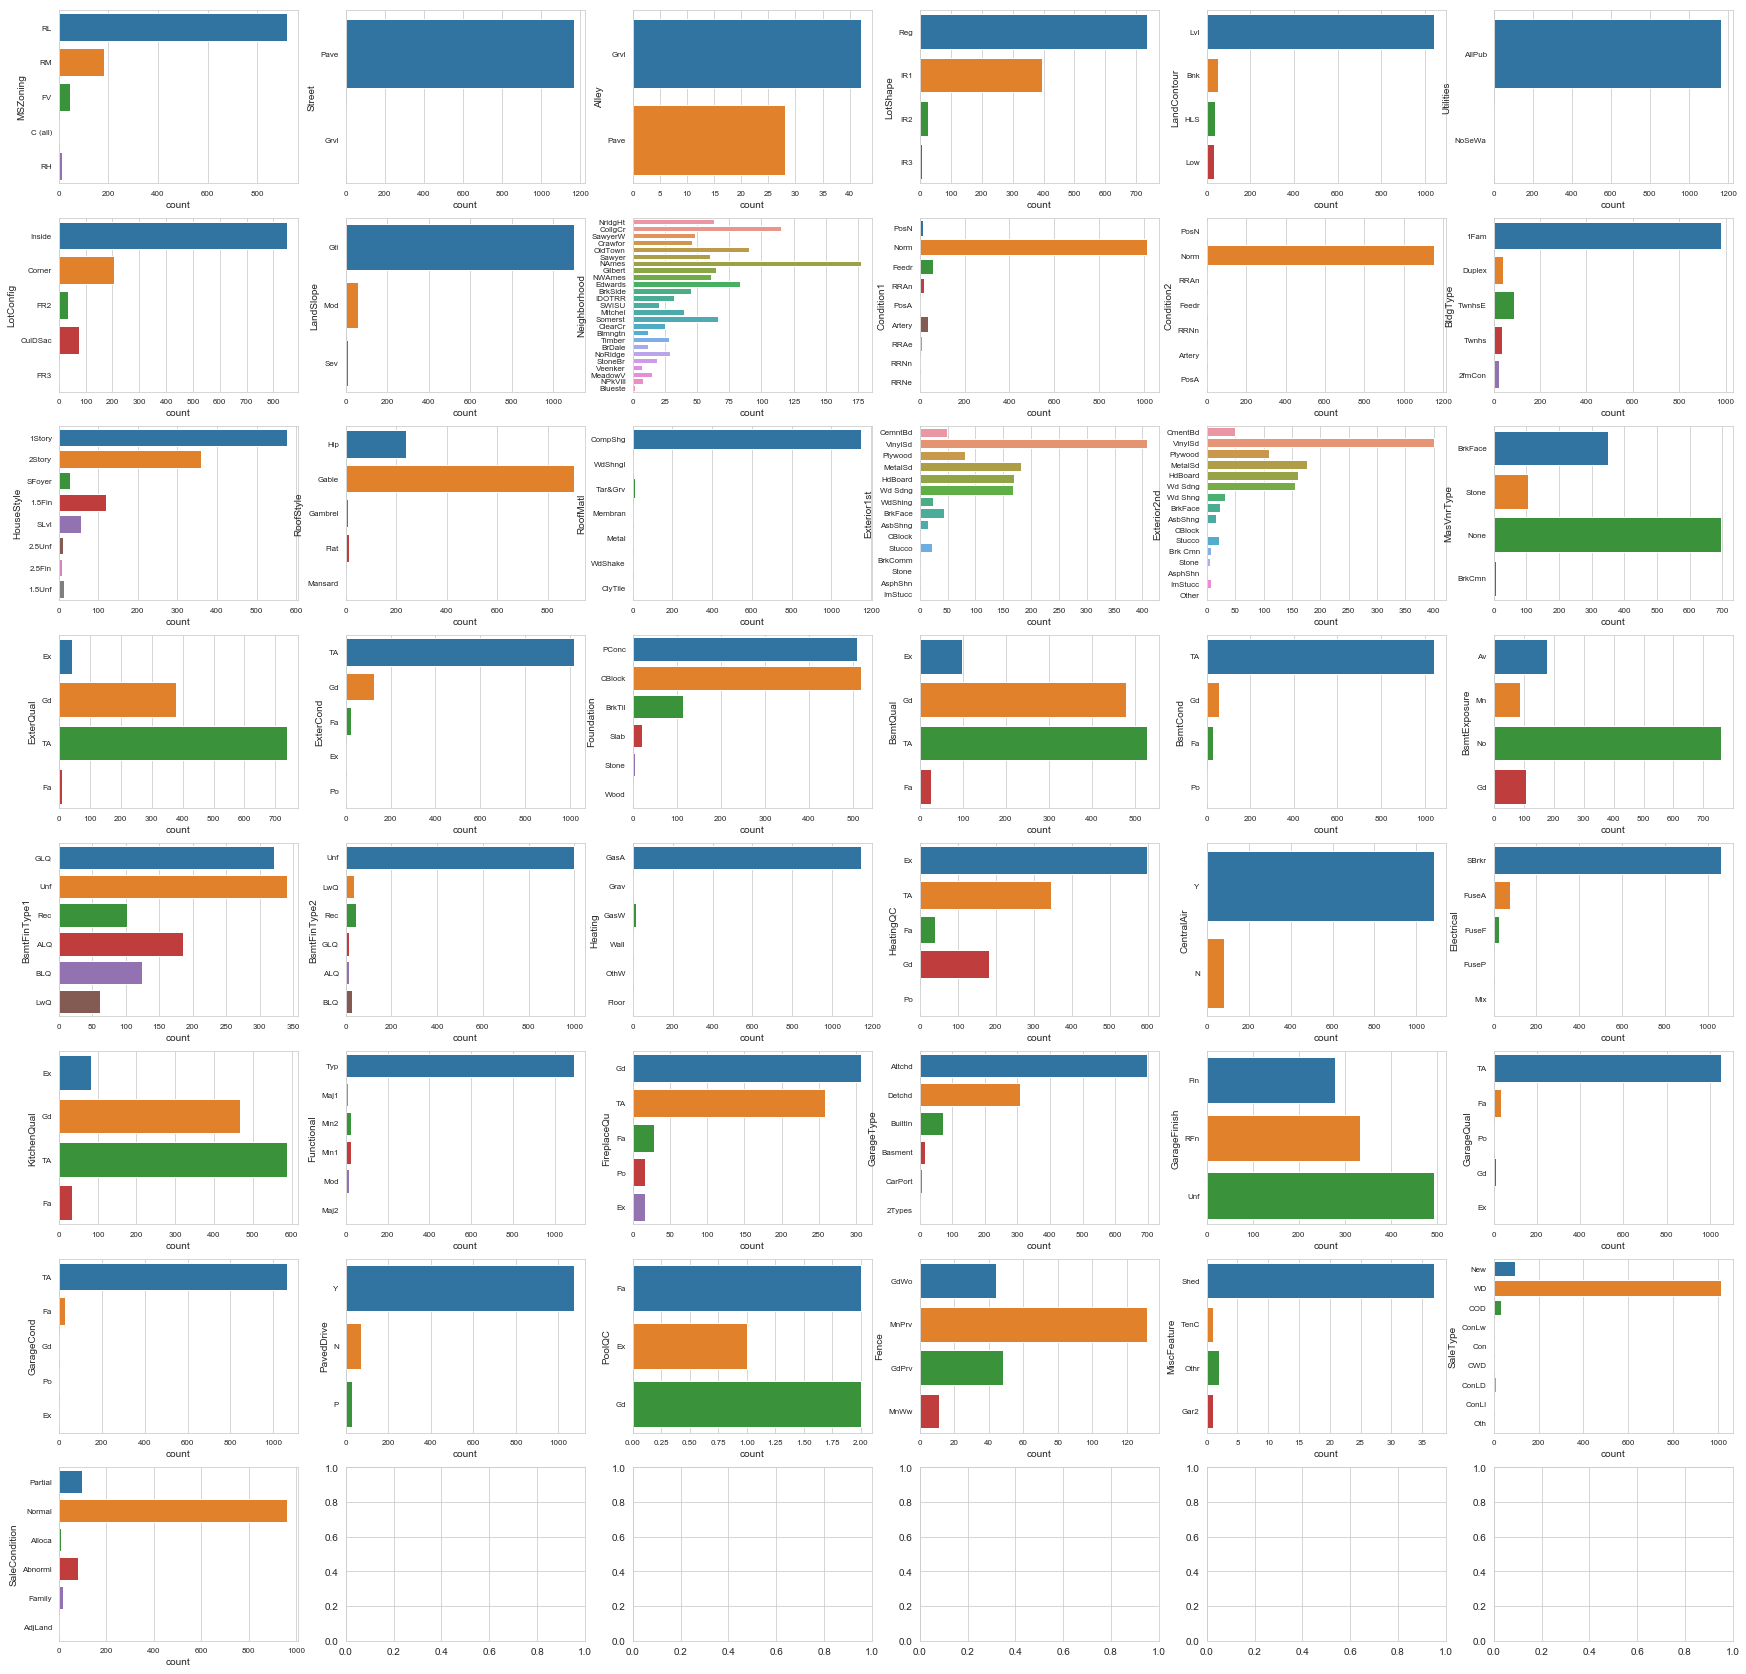

In [21]:
#call the function to plot the categorical features
features = cat_attrib.columns.values[0:]
plot_new_feature_distribution(cat_attrib,features)

In [22]:
#plotting the relationship of sale price and other variables
#sns.pairplot(train)

In [23]:
#create a table of correlations between all features and median house value
corr_matrix=strat_train_set.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

#the variables with the lowest correlations are

#BsmtFinSF2      -0.003980
#YrSold          -0.005636
#MiscVal         -0.024854
#LowQualFinSF    -0.030394
#Id              -0.030571
#BsmtHalfBath    -0.040339

SalePrice        1.000000
OverallQual      0.800531
GrLivArea        0.700908
GarageCars       0.651388
GarageArea       0.634647
TotalBsmtSF      0.604969
1stFlrSF         0.596394
FullBath         0.563145
TotRmsAbvGrd     0.534714
YearBuilt        0.528381
YearRemodAdd     0.526142
GarageYrBlt      0.493869
Fireplaces       0.462406
MasVnrArea       0.461716
LotFrontage      0.353105
BsmtFinSF1       0.351111
OpenPorchSF      0.325071
WoodDeckSF       0.312707
2ndFlrSF         0.307961
HalfBath         0.290130
LotArea          0.275339
BsmtUnfSF        0.242704
BsmtFullBath     0.231159
BedroomAbvGr     0.175717
ScreenPorch      0.127168
MoSold           0.083639
3SsnPorch        0.056172
PoolArea         0.015600
BsmtFinSF2      -0.003980
YrSold          -0.005636
MiscVal         -0.024854
LowQualFinSF    -0.030394
Id              -0.030571
BsmtHalfBath    -0.040339
OverallCond     -0.081920
MSSubClass      -0.087740
EnclosedPorch   -0.130961
KitchenAbvGr    -0.137589
Name: SalePr

In [24]:
#create a table of correlations between relevant features (corr > 0.05) and median house value
corr_matrix=strat_train_set.corr()
cor_target=abs(corr_matrix['SalePrice'].sort_values(ascending=False))

relevant_features = cor_target[cor_target>0.05].index
relevant_features


Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'Fireplaces', 'MasVnrArea',
       'LotFrontage', 'BsmtFinSF1', 'OpenPorchSF', 'WoodDeckSF', '2ndFlrSF',
       'HalfBath', 'LotArea', 'BsmtUnfSF', 'BsmtFullBath', 'BedroomAbvGr',
       'ScreenPorch', 'MoSold', '3SsnPorch', 'OverallCond', 'MSSubClass',
       'EnclosedPorch', 'KitchenAbvGr'],
      dtype='object')

In [66]:
# create function to find correlated features to the target variable with a user supplied upper and lower limit
# for correlation values between features and the target variable
def CorrelatedFeatureFinder(df,target,lower_limit,upper_limit):
    X_matrix=df.corr()
    cor_target=(abs(X_matrix[target].sort_values(ascending=False)))
    relevant_features = cor_target[cor_target.between(lower_limit,upper_limit,inclusive=False)].index
    correlated=df[relevant_features]
    return pd.DataFrame(correlated)


In [67]:
ace='SalePrice'

In [546]:
cor_feats=CorrelatedFeatureFinder(strat_train_set,ace,0.45,0.99)
cor_feats.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,Fireplaces,MasVnrArea
825,10,2084,3,1220,2078,2084,2,7,2007,2008,2007.0,1,816.0
948,7,1776,2,474,936,936,2,7,2002,2002,2002.0,1,144.0
188,5,1224,2,528,1086,1224,0,6,1979,1979,1979.0,2,275.0
1059,6,1991,2,432,854,1096,1,7,1932,1950,1977.0,1,480.0
667,6,1679,2,575,1408,1679,2,7,1994,1998,1994.0,1,258.0


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

def CorrelatedFeatureFinder(db,tgt,ll,ul):
    X_matrix=db.corr()
    cor_target=(abs(X_matrix[tgt].sort_values(ascending=False)))
    relevant_features = cor_target[cor_target.between(ll,ul,inclusive=False)].index
    correlated=df[relevant_features]
    return pd.DataFrame(correlated)

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, df,target,lower_limit,upper_limit):
        self.df = df
        self.target = target
        self.lower_limit = lower_limit
        self.upper_limit = upper_limit
    def fit(self, X, y=None):
        self.CorrelatedFeatures_ = CorrelatedFeatureFinder(self.df, self.target,self.lower_limit,self.upper_limit)
        return self
    def transform(self, X):
        return X[:,self.CorrelatedFeatures_]

In [71]:
#viewing missing data in the stratified training set
null_values=strat_train_set.isnull().sum().sort_values(ascending=False)/len(strat_train_set)*100
null_values[null_values>0.000]


PoolQC          99.571918
MiscFeature     96.489726
Alley           94.006849
Fence           79.880137
FireplaceQu     46.318493
LotFrontage     17.636986
GarageCond       5.393836
GarageType       5.393836
GarageYrBlt      5.393836
GarageFinish     5.393836
GarageQual       5.393836
BsmtExposure     2.996575
BsmtFinType2     2.996575
BsmtFinType1     2.910959
BsmtCond         2.910959
BsmtQual         2.910959
MasVnrArea       0.684932
MasVnrType       0.684932
Electrical       0.085616
dtype: float64

In [72]:
#viewing missing data in the stratified training set
null_values=strat_train_set.isnull().sum().sort_values(ascending=False)/len(train)*100
removeable_nulls=null_values[null_values>0.00].index
strat_copy=strat_train_set.copy()

strat_copy.drop(removeable_nulls,axis = 1)


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
825,826,20,RL,14803,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,PosN,PosN,1Fam,1Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Ex,TA,PConc,1636,0,442,2078,GasA,Ex,Y,2084,0,0,2084,1,0,2,0,2,1,Ex,7,Typ,1,3,1220,Y,188,45,0,0,0,0,0,6,2008,New,Partial,385000
948,949,60,RL,14006,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,0,0,936,936,GasA,Ex,Y,936,840,0,1776,0,0,2,1,3,1,Gd,7,Typ,1,2,474,Y,144,96,0,0,0,0,0,2,2006,WD,Normal,192500
188,189,90,RL,7018,Pave,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,Duplex,SFoyer,5,5,1979,1979,Gable,CompShg,Plywood,Plywood,TA,TA,CBlock,1086,0,0,1086,GasA,TA,Y,1224,0,0,1224,2,0,0,2,2,2,TA,6,Typ,2,2,528,Y,120,0,0,0,0,0,0,6,2009,WD,Alloca,153337
1059,1060,50,RL,11275,Pave,IR1,HLS,AllPub,Corner,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,6,7,1932,1950,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,297,557,0,854,GasA,TA,Y,1096,895,0,1991,0,0,1,1,3,1,TA,7,Typ,1,2,432,Y,0,0,19,0,0,0,0,3,2007,WD,Normal,220000
667,668,20,RL,8125,Pave,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,6,5,1994,1998,Gable,CompShg,HdBoard,HdBoard,TA,TA,PConc,1138,0,270,1408,GasA,Ex,Y,1679,0,0,1679,1,0,2,0,3,1,Gd,7,Typ,1,2,575,Y,224,42,0,0,0,0,0,10,2008,WD,Normal,193500
968,969,50,RM,5925,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,3,6,1910,1950,Gable,CompShg,VinylSd,VinylSd,TA,TA,BrkTil,0,0,600,600,Grav,Fa,N,600,368,0,968,0,0,1,0,2,1,TA,6,Typ,0,0,0,Y,0,0,0,0,0,0,0,5,2009,WD,Abnorml,37900
1194,1195,60,RL,9364,Pave,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Norm,Norm,1Fam,2Story,6,7,1969,1969,Gable,CompShg,HdBoard,HdBoard,TA,TA,CBlock,371,0,292,663,GasA,TA,Y,663,689,0,1352,0,0,1,1,4,1,TA,7,Typ,0,1,299,Y,379,36,0,0,0,0,0,3,2010,WD,Normal,158000
331,332,20,RL,8176,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1958,1992,Gable,CompShg,Wd Sdng,Wd Sdng,TA,TA,CBlock,846,0,210,1056,GasA,Fa,Y,1056,0,0,1056,1,0,1,0,3,1,TA,6,Typ,0,1,308,Y,0,0,0,0,0,0,0,8,2007,WD,Normal,139000
1437,1438,20,RL,12444,Pave,Reg,Lvl,AllPub,FR2,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Ex,TA,PConc,1336,0,596,1932,GasA,Ex,Y,1932,0,0,1932,1,0,2,0,2,1,Ex,7,Typ,1,3,774,Y,0,66,0,304,0,0,0,11,2008,New,Partial,394617
25,26,20,RL,14230,Pave,Reg,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,0,0,1566,1566,GasA,Ex,Y,1600,0,0,1600,0,0,2,0,3,1,Gd,7,Typ,1,3,890,Y,0,56,0,0,0,0,0,7,2009,WD,Normal,256300


In [73]:
#create a function to drop columns missing more than 30% of the data
def Null_Remover(df,pct_cuttoff):
    null_values=df.isnull().sum()/len(df)*100
    removables=null_values[null_values>pct_cuttoff].index
    copy_df=df.copy()
    #global housing
    housing=pd.DataFrame(copy_df.drop(removables,axis=1))
    print('type "housing" to see the resulting dataframe ')
    print('here are the columns removed:',removables.tolist())
    return pd.DataFrame(housing)

In [74]:
# run the null remover function on the stratified training set
housing=Null_Remover(strat_train_set,30)

type "housing" to see the resulting dataframe 
here are the columns removed: ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [75]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
825,826,20,RL,114.0,14803,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,PosN,PosN,1Fam,1Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,BrkFace,816.0,Ex,TA,PConc,Ex,TA,Av,GLQ,1636,Unf,0,442,2078,GasA,Ex,Y,SBrkr,2084,0,0,2084,1,0,2,0,2,1,Ex,7,Typ,1,Attchd,2007.0,Fin,3,1220,TA,TA,Y,188,45,0,0,0,0,0,6,2008,New,Partial,385000
948,949,60,RL,65.0,14006,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0,Unf,0,936,936,GasA,Ex,Y,SBrkr,936,840,0,1776,0,0,2,1,3,1,Gd,7,Typ,1,Attchd,2002.0,RFn,2,474,TA,TA,Y,144,96,0,0,0,0,0,2,2006,WD,Normal,192500
188,189,90,RL,64.0,7018,Pave,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,Duplex,SFoyer,5,5,1979,1979,Gable,CompShg,Plywood,Plywood,Stone,275.0,TA,TA,CBlock,Gd,TA,Av,GLQ,1086,Unf,0,0,1086,GasA,TA,Y,SBrkr,1224,0,0,1224,2,0,0,2,2,2,TA,6,Typ,2,Detchd,1979.0,Unf,2,528,TA,TA,Y,120,0,0,0,0,0,0,6,2009,WD,Alloca,153337
1059,1060,50,RL,NaN,11275,Pave,IR1,HLS,AllPub,Corner,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,6,7,1932,1950,Gable,CompShg,MetalSd,MetalSd,BrkFace,480.0,TA,TA,CBlock,TA,TA,Mn,Rec,297,LwQ,557,0,854,GasA,TA,Y,SBrkr,1096,895,0,1991,0,0,1,1,3,1,TA,7,Typ,1,Detchd,1977.0,Unf,2,432,TA,Fa,Y,0,0,19,0,0,0,0,3,2007,WD,Normal,220000
667,668,20,RL,65.0,8125,Pave,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,6,5,1994,1998,Gable,CompShg,HdBoard,HdBoard,BrkFace,258.0,TA,TA,PConc,Gd,TA,No,GLQ,1138,Unf,0,270,1408,GasA,Ex,Y,SBrkr,1679,0,0,1679,1,0,2,0,3,1,Gd,7,Typ,1,Attchd,1994.0,RFn,2,575,TA,TA,Y,224,42,0,0,0,0,0,10,2008,WD,Normal,193500


In [76]:
housing_labels=housing.SalePrice.copy()
log_housing_labels=np.log(housing_labels)
housing=housing.drop(columns=['SalePrice','Id'])

In [80]:
#separate categorical variables from numerical 
cat_attrib=housing.select_dtypes(include=['object'])
num_attrib=housing.select_dtypes(exclude=['object'])

In [342]:
#create custom function to split the data between categorical and numerical

def DataTypeSplitter(df):
    cat_attributes=df.select_dtypes(include=['object'])
    num_attributes=df.select_dtypes(exclude=['object'])
    return list(cat_attributes),list(num_attributes)

In [82]:
#test the data type splitter function
cat,num=DataTypeSplitter(strat_train_set)

In [83]:
#view the percent missing of categorical data
cat_nulls=cat_attrib.isnull().sum().sort_values(ascending=False)/len(cat_attrib)*100
cat_nulls[cat_nulls>0.000]

GarageCond      5.393836
GarageQual      5.393836
GarageFinish    5.393836
GarageType      5.393836
BsmtFinType2    2.996575
BsmtExposure    2.996575
BsmtCond        2.910959
BsmtQual        2.910959
BsmtFinType1    2.910959
MasVnrType      0.684932
Electrical      0.085616
dtype: float64

In [87]:
#lets impute the missing data with the most frequent values
cat_imputer=SimpleImputer(strategy='most_frequent')
imputed_cats=cat_imputer.fit_transform(cat_attrib)
#cat_imputer.statistics_
pd.DataFrame(imputed_cats)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,PosN,PosN,1Fam,1Story,Hip,CompShg,CemntBd,CmentBd,BrkFace,Ex,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Attchd,Fin,TA,TA,Y,New,Partial
1,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,Duplex,SFoyer,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Alloca
3,RL,Pave,IR1,HLS,AllPub,Corner,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,MetalSd,MetalSd,BrkFace,TA,TA,CBlock,TA,TA,Mn,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Detchd,Unf,TA,Fa,Y,WD,Normal
4,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,BrkFace,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
5,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,Grav,Fa,N,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Abnorml
6,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Norm,Norm,1Fam,2Story,Gable,CompShg,HdBoard,HdBoard,Stone,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
7,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,Fa,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
8,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,NridgHt,Norm,Norm,1Fam,1Story,Hip,CompShg,VinylSd,VinylSd,Stone,Ex,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Attchd,Fin,TA,TA,Y,New,Partial
9,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [274]:
#Most Machine Learning algorithms prefer to work with numbers anyway, 
#so let’s convert these categories from text to numbers.

cat_encoder=OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(imputed_cats)
housing_cat_1hot

<1168x230 sparse matrix of type '<class 'numpy.float64'>'
	with 44384 stored elements in Compressed Sparse Row format>

In [292]:
are=cat_encoder.categories_
are

[array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object),
 array(['Grvl', 'Pave'], dtype=object),
 array(['IR1', 'IR2', 'IR3', 'Reg'], dtype=object),
 array(['Bnk', 'HLS', 'Low', 'Lvl'], dtype=object),
 array(['AllPub', 'NoSeWa'], dtype=object),
 array(['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'], dtype=object),
 array(['Gtl', 'Mod', 'Sev'], dtype=object),
 array(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
        'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
        'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown',
        'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
        'Veenker'], dtype=object),
 array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe',
        'RRNn'], dtype=object),
 array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAn', 'RRNn'],
       dtype=object),
 array(['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'], dtype=object),
 array(['1.5Fin', '1.5Unf', '1Story', '2.5Fin', '

In [360]:
#Now use pipeline constructor with all the categorical variables
cat_pipeline=Pipeline([('imputer',SimpleImputer(strategy='most_frequent')),
                      ('cat_encoder',OneHotEncoder(handle_unknown='ignore'))])

housing_cat_trans=cat_pipeline.fit_transform(cat_attrib)
housing_cat_trans

<1168x230 sparse matrix of type '<class 'numpy.float64'>'
	with 44384 stored elements in Compressed Sparse Row format>

In [84]:
#view the percent missing of numerical data
num_nulls=num_attrib.isnull().sum().sort_values(ascending=False)/len(num_attrib)*100
num_nulls[num_nulls>0.000]

LotFrontage    17.636986
GarageYrBlt     5.393836
MasVnrArea      0.684932
dtype: float64

In [ ]:
#we should be able to impute the missing values for LotFrontage with the average value


In [101]:
#lets inspect the relationship between year build and GarageYrBlt
num_attrib[num_attrib['YearBuilt']!=num_attrib['GarageYrBlt']].head()

# the result is that they are not the same

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1059,50,NaN,11275,6,7,1932,1950,480.0,297,557,0,854,1096,895,0,1991,0,0,1,1,3,1,7,1,1977.0,2,432,0,0,19,0,0,0,0,3,2007
968,50,50.0,5925,3,6,1910,1950,0.0,0,0,600,600,600,368,0,968,0,0,1,0,2,1,6,0,NaN,0,0,0,0,0,0,0,0,0,5,2009
1114,20,90.0,5400,5,7,1954,2000,0.0,415,0,418,833,833,0,0,833,0,0,1,0,2,1,4,0,1955.0,1,326,0,0,0,0,0,0,0,8,2006
987,20,83.0,10159,9,5,2009,2010,450.0,1646,0,284,1930,1940,0,0,1940,1,0,2,1,3,1,8,1,2010.0,3,606,168,95,0,0,0,0,0,4,2010
741,20,65.0,6768,6,8,1961,1996,0.0,832,0,80,912,912,0,0,912,1,1,1,0,3,1,5,0,1962.0,1,288,168,0,0,0,0,0,0,5,2008


In [102]:
#impute the GarageYrBlt with the corresponding year if the YearBuilt is greater than 1980 and the garage year built is missing
num_attrib.loc[(num_attrib['YearBuilt']>= 1980 & num_attrib.GarageYrBlt.isnull()), 'GarageYrBlt'] = num_attrib['YearBuilt']


                              

C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [104]:
#view the percent missing of numerical data
num_nulls=num_attrib.isnull().sum().sort_values(ascending=False)/len(num_attrib)*100
num_nulls[num_nulls>0.000]

LotFrontage    17.636986
MasVnrArea      0.684932
dtype: float64

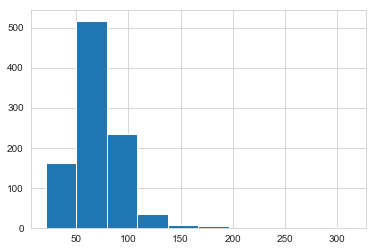

In [105]:
#lets inspect LotFrontage
num_attrib.LotFrontage.hist()

In [109]:
num_attrib.LotFrontage.mean()

70.4085239085239

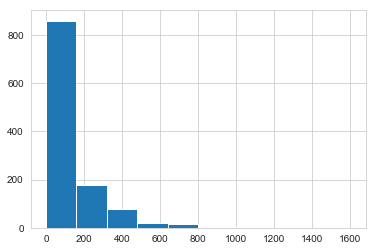

In [111]:
num_attrib.MasVnrArea.hist()

In [113]:
num_attrib.MasVnrArea.mean()

102.41982758620689

In [283]:
#lets impute the missing numerical values with the average

num_pipeline=Pipeline([('num_imputer',SimpleImputer(strategy='mean')),
                      ('MinMaxScaler',MinMaxScaler())])

housing_num_trans=num_pipeline.fit_transform(num_attrib)
pd.DataFrame(housing_num_trans).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,0.000000,0.318493,0.063114,1.000000,0.50,0.978261,0.966667,0.510000,0.289865,0.000000,0.189212,0.340098,0.401560,0.000000,0.0,0.329691,0.333333,0.0,0.666667,0.0,0.250,0.333333,0.416667,0.333333,0.978261,0.75,0.860367,0.219370,0.082267,0.00000,0.0,0.0,0.0,0.0,0.454545,0.50
1,0.235294,0.150685,0.059389,0.666667,0.50,0.942029,0.866667,0.090000,0.000000,0.000000,0.400685,0.153191,0.138137,0.462046,0.0,0.271665,0.000000,0.0,0.666667,0.5,0.375,0.333333,0.416667,0.333333,0.942029,0.50,0.334274,0.168028,0.175503,0.00000,0.0,0.0,0.0,0.0,0.090909,0.00
2,0.411765,0.147260,0.026726,0.444444,0.50,0.775362,0.483333,0.171875,0.192417,0.000000,0.000000,0.177741,0.204222,0.000000,0.0,0.167671,0.666667,0.0,0.000000,1.0,0.250,0.666667,0.333333,0.666667,0.775362,0.50,0.372355,0.140023,0.000000,0.00000,0.0,0.0,0.0,0.0,0.454545,0.75
3,0.176471,0.169207,0.046624,0.555556,0.75,0.434783,0.000000,0.300000,0.052622,0.377883,0.000000,0.139771,0.174851,0.492299,0.0,0.312170,0.000000,0.0,0.333333,0.5,0.375,0.333333,0.416667,0.333333,0.434783,0.50,0.304654,0.000000,0.000000,0.03442,0.0,0.0,0.0,0.0,0.181818,0.25
4,0.000000,0.150685,0.031901,0.555556,0.50,0.884058,0.800000,0.161250,0.201630,0.000000,0.115582,0.230442,0.308628,0.000000,0.0,0.253391,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.416667,0.333333,0.884058,0.50,0.405501,0.261377,0.076782,0.00000,0.0,0.0,0.0,0.0,0.818182,0.50


In [284]:
housing_num=list(num_attrib)
housing_cat=list(cat_attrib)

In [324]:
def ImputeGarageYrBlt(df):
    data_frame=df.loc[(df['YearBuilt']>= 1980 & df.GarageYrBlt.isnull()), 'GarageYrBlt'] = df['YearBuilt']
    return data_frame


In [361]:
#full pipleline with the column transformer

full_pipeline= ColumnTransformer([('num',num_pipeline,housing_num),('cat',cat_pipeline,housing_cat)])
housing_prepared=full_pipeline.fit_transform(housing)


In [34]:
df_train= train[cols]
df_train.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,YearBuilt,GarageArea,FullBath,TotalBsmtSF,GarageYrBlt,1stFlrSF,YearRemodAdd,TotRmsAbvGrd,Fireplaces,OpenPorchSF,LotArea
0,208500,7,1710,2,2003,548,2,856,2003.0,856,2003,8,0,61,8450
1,181500,6,1262,2,1976,460,2,1262,1976.0,1262,1976,6,1,0,9600
2,223500,7,1786,2,2001,608,2,920,2001.0,920,2002,6,1,42,11250
3,140000,7,1717,3,1915,642,1,756,1998.0,961,1970,7,1,35,9550
4,250000,8,2198,3,2000,836,2,1145,2000.0,1145,2000,9,1,84,14260


## Linear regression to predict overall score

In [39]:
#assumptions of linear regression
# all variables are continuous and not categorical
# data is free of missing values
# there is a linear relationship between predictors and predictants
# all predictors of independent of each other
# residuals/predictor errors are normally distributed

In [516]:
lin_reg=LinearRegression(normalize=True)
lin_reg.fit(housing_prepared,log_housing_labels)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [517]:
# try linear regression on some data
# select the first records
some_data= housing.iloc[:5]
some_labels=log_housing_labels.iloc[:5]

# transform the first 5 records
some_data_prepared=full_pipeline.transform(some_data)

print("Predictions",lin_reg.predict(some_data_prepared))
print("Housing Labels", list(some_labels))

Predictions [12.86099869 12.20902149 11.91946512 12.23072103 12.27093074]
Housing Labels [12.86099861326992, 12.167851432709975, 11.940393392554734, 12.301382825334498, 12.173032791451973]


### Look at room mean squared error

In [518]:
housing_predictions=lin_reg.predict(housing_prepared)
lin_mse= mean_squared_error(log_housing_labels,housing_predictions)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

0.08883111722418484

### Ridge Regression - Regularize Linear regression

In [488]:
ridge_reg = Ridge(alpha =5,solver = "sag")
ridge_reg.fit(housing_prepared,log_housing_labels)
ridge_predictions=ridge_reg.predict(housing_prepared)
ridge_mse=mean_squared_error(log_housing_labels,ridge_predictions)
ridge_rmse=np.sqrt(ridge_mse)
ridge_rmse

0.1090285212124129

### Stochastic Gradient Decent - Linear Regression

In [527]:
sgd_reg = SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=5000,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=0.0003,
       validation_fraction=0.1, verbose=0, warm_start=False)
sgd_reg.fit(housing_prepared,log_housing_labels.ravel())

sgd_housing_predictions=sgd_reg.predict(housing_prepared)
lin_mse= mean_squared_error(log_housing_labels,sgd_housing_predictions)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

0.13162494466604976

### Decision Tree Regressor

In [471]:
tree_reg= DecisionTreeRegressor()
tree_reg.fit(housing_prepared,log_housing_labels)
tree_reg_predictions=tree_reg.predict(housing_prepared)
tree_mse= mean_squared_error(log_housing_labels,tree_reg_predictions)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

## badly overfits the data

3.636343153352834e-05

### Lasso Regression

In [476]:
lasso_reg = Lasso(alpha = 0.0001) 
lasso_reg.fit(housing_prepared,log_housing_labels) 
lasso_predictions=lasso_reg.predict(housing_prepared)
lasso_mse= mean_squared_error(log_housing_labels,lasso_predictions)
lasso_rmse=np.sqrt(lasso_mse)
lasso_rmse

0.09180854312308466

### Polynomial Regression

In [532]:
polynomial_regression = Pipeline([("poly_features" , PolynomialFeatures(degree = 2 , include_bias = False)), 
                                   ("lin_reg" , LinearRegression (normalize=True))])
polynomial_regression.fit(housing_prepared,log_housing_labels)
polynomial_predictions=polynomial_regression.predict(housing_prepared)
polynomial_mse= mean_squared_error(log_housing_labels,polynomial_predictions)
polynomial_rmse=np.sqrt(polynomial_mse)
polynomial_rmse

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True))])

In [533]:
polynomial_predictions=polynomial_regression.predict(housing_prepared)
polynomial_mse= mean_squared_error(log_housing_labels,polynomial_predictions)
polynomial_rmse=np.sqrt(polynomial_mse)
polynomial_rmse

1.3694223672427373e-06

### Kernel Ridge regression

In [538]:
kernel_ridge = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
kernel_ridge.fit(housing_prepared,log_housing_labels)
kernel_ridge_predictions=kernel_ridge.predict(housing_prepared)
kernel_ridge_mse= mean_squared_error(log_housing_labels,kernel_ridge_predictions)
kernel_ridge_rmse=np.sqrt(kernel_ridge_mse)
kernel_ridge_rmse

0.12791773786353383

### Cross Validation of models

In [539]:
#polynomial cross validation
kernel_ridge_scores=cross_val_score(kernel_ridge,housing_prepared,log_housing_labels,scoring="neg_mean_squared_error",cv=10)

kernel_ridge_rmse_scores=np.sqrt(-kernel_ridge_scores)

display_scores(kernel_ridge_rmse_scores)

Scores [0.15229036 0.13975135 0.1485238  0.15237321 0.12482654 0.1302145
 0.13664105 0.13229984 0.18848496 0.15232772]
Mean 0.14577333203497655
Standard Deviation 0.017154828501324017


#### Lasso cross validation

In [477]:
#lasso cross validation
lasso_scores=cross_val_score(lasso_reg,housing_prepared,log_housing_labels,scoring="neg_mean_squared_error",cv=10)

lasso_rmse_scores=np.sqrt(-lasso_scores)

display_scores(lasso_rmse_scores)

Scores [0.12472582 0.12610459 0.12158478 0.12343958 0.1058516  0.12187801
 0.10444555 0.10796853 0.27265126 0.1252691 ]
Mean 0.13339188223456586
Standard Deviation 0.047118030814322774


#### decision tree cross validation

In [472]:
# let use cross validation to get better scores
scores=cross_val_score(tree_reg,housing_prepared,log_housing_labels,scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([0.18481085, 0.17609877, 0.18729406, 0.20274436, 0.1754722 ,
       0.19572256, 0.19414654, 0.20588976, 0.21298355, 0.17707107])

In [473]:
def display_scores(scores):
    print("Scores",scores)
    print("Mean",scores.mean())
    print("Standard Deviation",scores.std())
display_scores(tree_rmse_scores)

Scores [0.18481085 0.17609877 0.18729406 0.20274436 0.1754722  0.19572256
 0.19414654 0.20588976 0.21298355 0.17707107]
Mean 0.1912233714874771
Standard Deviation 0.012585029184398777


##### use cross validation with linear regression

In [519]:
#use cross validation with linear regression

lin_scores=cross_val_score(lin_reg,housing_prepared,log_housing_labels,scoring="neg_mean_squared_error",cv=10)

lin_rmse_scores=np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Scores [0.13119956 0.13493456 0.11892478 0.13676489 0.10999652 0.13628309
 0.12024339 0.16473673 0.29724883 0.13331596]
Mean 0.14836482915123225
Standard Deviation 0.051522963251831796


#### random forest cross validation

In [524]:
# random forest cross validation
forest_reg=RandomForestRegressor()
forest_reg.fit(housing_prepared,log_housing_labels)

forest_scores=cross_val_score(forest_reg,housing_prepared,log_housing_labels,scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores=np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Scores [0.14797175 0.1475492  0.16951877 0.13807662 0.13427565 0.14503323
 0.13187759 0.13018415 0.18691389 0.12515766]
Mean 0.14565585256416644
Standard Deviation 0.01821357753735605


#### SVG cross validation

In [522]:
#SVG cross validation

sgd_reg_scores=cross_val_score(sgd_reg,housing_prepared,log_housing_labels,scoring="neg_mean_squared_error",cv=10)
sgd_reg_rmse_scores=np.sqrt(-sgd_reg_scores)
display_scores(sgd_reg_rmse_scores)

C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1

Scores [0.16131329 0.15470224 0.17925412 0.16142136 0.15859213 0.14643943
 0.18958043 0.16666364 0.21176427 0.16181768]
Mean 0.16915485838887953
Standard Deviation 0.018309937502275945


C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


### Fine Tune with grid search

In [416]:
# Scikit-Learn’s GridSearchCV searchs through all hyper parameters to find the best combination
param_grid = [{ 'n_estimators':[3,10,30],'max_features':[ 2,4,6,8]},
              {'bootstrap':[False], 'n_estimators':[3,10], 'max_features':[2,3,4]}]

grid_search = GridSearchCV(forest_reg,param_grid,cv = 5,scoring='neg_mean_squared_error',return_train_score = True)
grid_search.fit(housing_prepared,log_housing_labels)
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [417]:
cvres = grid_search.cv_results_ 
for mean_score , params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.22908536752673714 {'max_features': 2, 'n_estimators': 3}
0.1961690583558806 {'max_features': 2, 'n_estimators': 10}
0.17857417800219605 {'max_features': 2, 'n_estimators': 30}
0.21462451195790888 {'max_features': 4, 'n_estimators': 3}
0.18046315245243824 {'max_features': 4, 'n_estimators': 10}
0.1713388402286254 {'max_features': 4, 'n_estimators': 30}
0.20757813316250695 {'max_features': 6, 'n_estimators': 3}
0.17106432776931138 {'max_features': 6, 'n_estimators': 10}
0.165008658976122 {'max_features': 6, 'n_estimators': 30}
0.20305443537441448 {'max_features': 8, 'n_estimators': 3}
0.17132009697553993 {'max_features': 8, 'n_estimators': 10}
0.15982281394095207 {'max_features': 8, 'n_estimators': 30}
0.21695261192307175 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.18260963522658172 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.20628803883747035 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.1823898696835341 {'bootstrap': False, 'max_featu

In [486]:
# Ridge Regression - Scikit-Learn’s GridSearchCV searchs through all hyper parameters to find the best combination
param_grid = [{ 'alpha':[0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]}]

ridge_grid_search = GridSearchCV(ridge_reg,param_grid,cv = 10,scoring='neg_mean_squared_error',return_train_score = True)
ridge_grid_search.fit(housing_prepared,log_housing_labels)
ridge_grid_search.best_estimator_

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='sag', tol=0.001)

In [526]:
# SGD Regressor grid search
SGD_param_grid = [{ 'max_iter':[1000,3000,5000],'tol':[0.003,0.005,0.0003]}]
SGD_grid_search = GridSearchCV(sgd_reg,SGD_param_grid,cv = 10,scoring='neg_mean_squared_error',return_train_score = True)
SGD_grid_search.fit(housing_prepared,log_housing_labels)
SGD_grid_search.best_estimator_



SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=5000,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=0.0003,
       validation_fraction=0.1, verbose=0, warm_start=False)

### Analyze the Best Models and Their Errors

In [418]:
#RandomForestRegressor can indicate the relative importance of each attribute for making accurate predictions:

feature_importance=grid_search.best_estimator_.feature_importances_

feature_importance

array([8.54773484e-03, 1.34207347e-02, 2.67233653e-02, 5.73347599e-02,
       1.04568090e-02, 4.33270142e-02, 3.43283293e-02, 1.06258208e-02,
       2.28017164e-02, 1.47620924e-03, 8.82786582e-03, 3.78425402e-02,
       3.04064161e-02, 1.75278967e-02, 2.48675386e-04, 4.31989854e-02,
       2.93260743e-03, 1.29736992e-03, 2.13509814e-02, 5.39817823e-03,
       7.84202723e-03, 4.64588350e-04, 1.81045959e-02, 2.26422713e-02,
       4.02392045e-02, 2.79792158e-02, 4.32573325e-02, 5.90026555e-03,
       1.24071561e-02, 2.65176257e-03, 2.30599253e-04, 1.03503797e-03,
       5.97850374e-05, 1.18108575e-03, 7.49369733e-03, 3.60267171e-03,
       1.08086043e-03, 2.46947094e-03, 3.58864337e-04, 6.81280525e-03,
       1.32071320e-02, 3.90315795e-05, 2.17562410e-04, 3.27047394e-03,
       7.99580554e-04, 2.06802627e-04, 2.14219206e-03, 1.36277166e-03,
       9.67165483e-04, 9.66923723e-04, 1.44137202e-03, 0.00000000e+00,
       0.00000000e+00, 1.15516865e-03, 8.15007035e-04, 1.91949066e-04,
      

In [299]:
ate

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [240]:
#need this code to impute the missing data, create a dataframe with the imputed data, and lable the columns correctly
cat_imputer=SimpleImputer(strategy='most_frequent')
imputed_cats=cat_imputer.fit_transform(cat_attrib)
#cat_imputer.statistics_
bet=pd.DataFrame(imputed_cats)

bet=bet.rename(columns=dict(zip(bet.columns,ate)))


In [241]:
bet.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,PosN,PosN,1Fam,1Story,Hip,CompShg,CemntBd,CmentBd,BrkFace,Ex,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Attchd,Fin,TA,TA,Y,New,Partial
1,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,Duplex,SFoyer,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Alloca
3,RL,Pave,IR1,HLS,AllPub,Corner,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,MetalSd,MetalSd,BrkFace,TA,TA,CBlock,TA,TA,Mn,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Detchd,Unf,TA,Fa,Y,WD,Normal
4,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,BrkFace,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [302]:
#get list of the new features after they have been coverted to dummies
dummy_cats=list(pd.get_dummies(bet))

In [304]:
#join the numerial features to the dummy categorical featurs
new_attributes=housing_num + dummy_cats

In [308]:
# display these importance scores next to their corresponding attribute names:

important_feats=pd.DataFrame(sorted(zip(feature_importance , new_attributes), reverse = True),columns=['importance','feature'])
important_feats

,importance,feature
0,6.869150e-02,TotalBsmtSF
1,6.275898e-02,GrLivArea
2,4.210372e-02,BsmtQual_TA
3,3.977273e-02,GarageCars
4,3.645823e-02,FullBath
5,3.597806e-02,OverallQual
6,3.013731e-02,GarageYrBlt
7,2.982301e-02,GarageArea
8,2.204101e-02,KitchenQual_Ex
9,2.122355e-02,TotRmsAbvGrd


## Run the model on the validation set

In [310]:
strat_validation_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1048,1049,20,RL,100.0,21750,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,4,1960,2006,Hip,CompShg,HdBoard,HdBoard,BrkFace,75.0,TA,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1771,0,0,1771,0,0,1,0,3,1,TA,9,Min1,1,TA,Attchd,1960.0,Unf,2,336,TA,TA,Y,0,0,0,0,0,0,NaN,GdPrv,NaN,0,11,2009,WD,Normal,115000
600,601,60,RL,74.0,10927,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,280.0,Gd,TA,PConc,Gd,TA,Av,GLQ,546,Unf,0,512,1058,GasA,Ex,Y,SBrkr,1058,846,0,1904,1,0,2,1,3,1,Ex,8,Typ,1,Gd,BuiltIn,2003.0,Fin,2,736,TA,TA,Y,179,60,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,275000
845,846,85,RL,NaN,16647,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,SFoyer,5,5,1975,1981,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,1390,Unf,0,0,1390,GasA,TA,Y,SBrkr,1701,0,0,1701,1,0,2,0,3,1,TA,6,Min2,2,TA,Basment,1975.0,Fin,2,611,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,171000
172,173,160,RL,44.0,5306,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,2Story,7,7,1987,1987,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,Gd,PConc,Gd,Gd,No,GLQ,495,Rec,215,354,1064,GasA,Gd,Y,SBrkr,1064,703,0,1767,1,0,2,0,2,1,Gd,5,Typ,1,TA,Attchd,1987.0,RFn,2,504,Gd,TA,Y,441,35,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,239000
1183,1184,30,RL,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1920,1950,Hip,CompShg,Stucco,Stucco,None,0.0,TA,TA,BrkTil,TA,TA,No,Rec,821,Unf,0,299,1120,GasA,Ex,Y,SBrkr,1130,0,0,1130,1,0,1,0,2,1,TA,5,Typ,1,Gd,Detchd,1970.0,Unf,2,720,TA,TA,Y,229,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,120000


In [419]:
# configure the  validation sample for running the model (split features from target variable)
x_validation= strat_validation_set.drop(columns=['SalePrice','Id'])
y_validation= strat_validation_set.SalePrice.copy()
log_y_validation=np.log(y_validation)

In [420]:
# remove features with over 30% missing data and make sure columns removed are the same ones from the strat_training data
x_validation=Null_Remover(x_validation,30) 

type "housing" to see the resulting dataframe 
here are the columns removed: ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [421]:
x_validation.loc[(x_validation['YearBuilt']>= 1980 & x_validation.GarageYrBlt.isnull()), 'GarageYrBlt'] = x_validation['YearBuilt']

In [359]:
housing.Condition1.unique()

array(['PosN', 'Norm', 'Feedr', 'RRAn', 'PosA', 'Artery', 'RRAe', 'RRNn',
       'RRNe'], dtype=object)

In [357]:
x_validation.Condition1.unique()

array(['Norm', 'RRAe', 'Feedr', 'Artery', 'PosA', 'PosN', 'RRAn'],
      dtype=object)

In [335]:
target='SalePrice'
cor_val_feats=CorrelatedFeatureFinder(strat_validation_set,target,0.05,0.99)
cor_val_feats.columns

Index(['OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageCars',
       'GarageArea', 'FullBath', 'TotRmsAbvGrd', 'MasVnrArea', 'YearBuilt',
       'BsmtFinSF1', 'Fireplaces', 'GarageYrBlt', 'YearRemodAdd',
       'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath',
       'PoolArea', 'LotArea', 'BsmtFullBath', 'BedroomAbvGr', 'BsmtUnfSF',
       'BsmtHalfBath', 'ScreenPorch', 'OverallCond', 'MSSubClass', 'MoSold',
       'YrSold', 'EnclosedPorch', 'KitchenAbvGr'],
      dtype='object')

In [422]:
X_test_prepared=full_pipeline.transform(x_validation)

In [423]:
#run predictions with random forest regressor with grid search and cross validation
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test_prepared)


In [425]:
final_mse = mean_squared_error(log_y_validation,final_predictions) 
final_rmse = np.sqrt(final_mse)
final_rmse

0.17697697177089122

In [520]:
# run linear regression on data
lin_reg.predict(X_test_prepared)

fin_lin_predict=lin_reg.predict(X_test_prepared)
lin_mse= mean_squared_error(log_y_validation,fin_lin_predict)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

0.15141471526647526

In [521]:
final_lin_scores=cross_val_score(lin_reg,X_test_prepared,log_y_validation,scoring="neg_mean_squared_error",cv=10)
final_lin_rmse_scores=np.sqrt(-final_lin_scores)
display_scores(final_lin_rmse_scores)

Scores [0.21253976 0.33463546 0.21498176 0.63173929 0.2549766  0.2950839
 0.18520795 0.27007955 0.29594588 0.4977109 ]
Mean 0.31929010545355413
Standard Deviation 0.1332803976603663


### Ridge Regression

In [489]:
final_ridge_predictions=ridge_reg.predict(X_test_prepared)
final_ridge_mse=mean_squared_error(log_y_validation,final_ridge_predictions)
final_ridge_rmse=np.sqrt(final_ridge_mse)
final_ridge_rmse

0.14729862407011923

In [490]:
#ridge regression with cross validation
ridge_scores=cross_val_score(ridge_reg,X_test_prepared,log_y_validation,scoring="neg_mean_squared_error",cv=10)

final_ridge_rmse_scores=np.sqrt(-ridge_scores)

display_scores(final_ridge_rmse_scores)

Scores [0.12521451 0.2261925  0.14616369 0.28964348 0.16451538 0.16542502
 0.15011347 0.13154342 0.18726903 0.23802551]
Mean 0.1824106005492517
Standard Deviation 0.050355657554312996


### Stochastic Gradient Decent

In [529]:
final_sgd_predictions=sgd_reg.predict(X_test_prepared)
final_sgd_mse=mean_squared_error(log_y_validation,final_sgd_predictions)
final_sgd_rmse=np.sqrt(final_sgd_mse)
final_sgd_rmse

0.17856829630317467

In [528]:
#sgd regression with cross validation
final_sgd_scores=cross_val_score(sgd_reg,X_test_prepared,log_y_validation,scoring="neg_mean_squared_error",cv=15)

final_sgd_rmse_scores=np.sqrt(-final_sgd_scores)

display_scores(final_sgd_rmse_scores)

Scores [0.25488059 0.35308568 0.53474833 0.60212758 0.28144936 0.39438974
 0.26142848 0.65386324 0.24871841 0.30214551 0.24083312 0.41243338
 0.27830967 0.52074104 0.39277543]
Mean 0.3821286376026184
Standard Deviation 0.1323143359502484


### Lasso Regression

In [481]:
#Run lasso regression
final_lasso_predictions=lasso_reg.predict(X_test_prepared)
final_lasso_mse=mean_squared_error(log_y_validation,final_lasso_predictions)
final_lasso_rmse=np.sqrt(final_lasso_mse)
final_lasso_rmse

0.14737965049794435

In [485]:
#lasso regression with cross validation
final_lasso_scores=cross_val_score(lasso_reg,X_test_prepared,log_y_validation,scoring="neg_mean_squared_error",cv=15)

final_lasso_rmse_scores=np.sqrt(-final_lasso_scores)

display_scores(final_lasso_rmse_scores)

Scores [0.14815586 0.12466537 0.28724413 0.13134428 0.12806588 0.4653196
 0.13450537 0.17630314 0.23426365 0.15993328 0.12389073 0.11053735
 0.19980225 0.22676482 0.20018215]
Mean 0.19006519015323764
Standard Deviation 0.08828733854967354


In [501]:
#Lasso Regression with built in CV function
final_model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0001]).fit(X_test_prepared,log_y_validation)
final_model_lasso_scores=cross_val_score(final_model_lasso,X_test_prepared,log_y_validation,scoring="neg_mean_squared_error",cv=15)
final_model_lasso_rmse_scores=np.sqrt(-final_model_lasso_scores)

display_scores(final_model_lasso_rmse_scores)

C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_sele

Scores [0.13065431 0.09983514 0.25679898 0.12499621 0.11540748 0.37517013
 0.13343177 0.15855392 0.1477166  0.13877111 0.14590254 0.1465296
 0.15969386 0.16129665 0.22401097]
Mean 0.16791795134644694
Standard Deviation 0.06743462852845122


C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [502]:
coef = pd.Series(final_model_lasso.coef_, index = X_test_prepared.columns)
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")


AttributeError: columns not found

### Random Forest

In [491]:
#random forest regression with cross validation
final_forest_scores=cross_val_score(forest_reg,X_test_prepared,log_y_validation,scoring="neg_mean_squared_error",cv=15)

final_forest_rmse_scores=np.sqrt(-final_forest_scores)

display_scores(final_forest_rmse_scores)

Scores [0.10993895 0.11740669 0.30994372 0.18405002 0.13918729 0.27174926
 0.13425481 0.20372518 0.17486188 0.12788436 0.15850227 0.15122243
 0.16501632 0.20844774 0.28262436]
Mean 0.18258768474890816
Standard Deviation 0.059980663690064544


In [503]:
X_test_prepared

<292x266 sparse matrix of type '<class 'numpy.float64'>'
	with 17921 stored elements in Compressed Sparse Row format>

### Kernel Ridge Regression

In [540]:
#Run lasso regression
final_kernel_ridge_predictions=kernel_ridge.predict(X_test_prepared)
final_kernel_ridge_mse=mean_squared_error(log_y_validation,final_kernel_ridge_predictions)
final_final_kernel_rmse=np.sqrt(final_kernel_ridge_mse)
final_final_kernel_rmse

0.15537533645730509

In [541]:
#kernel regression with cross validation
final_kernel_ridge_scores=cross_val_score(kernel_ridge,X_test_prepared,log_y_validation,scoring="neg_mean_squared_error",cv=15)

final_kernel_ridge_rmse_scores=np.sqrt(-final_kernel_ridge_scores)

display_scores(final_kernel_ridge_rmse_scores)

Scores [0.12913057 0.11285774 0.25626666 0.14932378 0.13596803 0.27259021
 0.1668807  0.23910692 0.17484856 0.12931367 0.15068861 0.16777026
 0.16912929 0.22919857 0.30797513]
Mean 0.18606991251474808
Standard Deviation 0.05773441126696643


In [544]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1) 

In [545]:
averaged_models = AveragingModels(models = (kernel_ridge, forest_reg, lasso_reg, ridge_reg))
final_averaged_models_scores=cross_val_score(averaged_models,X_test_prepared,log_y_validation,scoring="neg_mean_squared_error",cv=15)

final_averaged_models_rmse_scores=np.sqrt(-final_averaged_models_scores)

display_scores(final_averaged_models_rmse_scores)

Scores [0.10897472 0.09732047 0.26367432 0.13186171 0.11926504 0.31357895
 0.1287838  0.17951128 0.18084492 0.10895188 0.12888416 0.12753365
 0.15390398 0.18337797 0.25657925]
Mean 0.16553640539386108
Standard Deviation 0.06281589454095461
